# Preprocessing and Exploratory Data Analysis

### Importing necessary libraries
In this block of code, we are importing the necessary libraries for data processing and visualization, and setting up the environment for inline plotting using %matplotlib inline. We are also ignoring any warnings that may occur during the analysis.

Next, we are reading the training and test data from the CSV files using pd.read_csv(), and printing out the shapes (number of rows and columns) and column names of the training dataset using the shape and columns attributes.

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#read files
raw_df = pd.read_csv('/kaggle/input/restaurant-revenue23/train.csv')
test_data = pd.read_csv('/kaggle/input/restaurant-revenue23/test.csv')

#Remove the 'Id' column from both datasets
raw_df = raw_df.drop('Id', axis=1)

### Reading the data files
In this code block, we are printing out the shape (number of rows and columns) and available features of the training and test datasets. This information is important for understanding the size and structure of the datasets, as well as for identifying the features we can use to predict the target variable.

The result of this code will show the shape and features of the training dataset and the test dataset.

In [2]:
print(f"Shape of training data: {raw_df.shape}\nShape of test dataset: {test_data.shape} \
    \nFeatures available: {raw_df.columns}")

Shape of training data: (137, 42)
Shape of test dataset: (100000, 42)     
Features available: Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')


The shape of the training dataset is (137, 43), which means there are 137 rows and 43 columns in the dataset. The shape of the test dataset is (100000, 42), which means there are 100,000 rows and 42 columns in the dataset. The available features are listed in the last line of the output.

### Checking for missing values and handling them

Data cleaning is an essential step in the data preprocessing pipeline, and it involves handling missing or unstructured data, removing duplicates, and transforming or encoding categorical variables. In this project, we will first check for missing data and then handle any unstructured data by encoding categorical variables.
To clean the data, we can start by checking for missing values and handling them appropriately. One way to do this is by using the isnull() function to identify the columns with missing values, and then use techniques such as imputation or removal of the missing values.

In [3]:
# To see all the columns in output this can be done.
pd.options.display.max_columns=None
# To see all rows change max_columns with max_rows

raw_df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
#Check for missing values
print(raw_df.isnull().sum())

#Remove missing values
raw_df = raw_df.dropna()

raw_df.isnull().sum().any()

Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64


False

 
 There are no missing values.
Last column 'revenue' is our target column.
Features from P1 to P37 are all numerical features about which we know nothing specifically. So, I will directly feed them into my model.
Id column is redundant, I will drop it. To avoid it we can choose it as index column while reading data.i.e., using pd.read_csv('filepath',index_col=col_name_or_positional_no)
In feature Open date, I will focus on month and year and drop date values.
City, City Group and Type are categorical columns. To feed them to ML model they need to be converted into machine-readable form which is numerical form.

### Exploratory Data Analysis
EDA is an important step in any data analysis project. It helps us to understand the data, identify patterns, and relationships between variables. Here are the possible exploratory visualizations that cloud be useful for this project:

1. e are creating a distribution plot of the target variable revenue using the sns.distplot() function. We set the hist parameter to False to show only the kernel density estimate (KDE) plot.

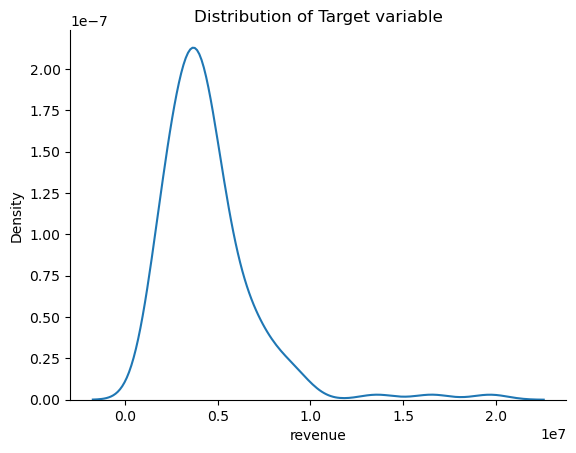

In [5]:
# Plot distribution of transformed revenue column
sns.distplot(raw_df['revenue'],hist=False)
plt.title('Distribution of Target variable')
sns.despine();

It is important to remove any outliers that may have a significant impact on the analysis, as they can skew the results and affect the performance of the models. In this case, we chose to remove any values in the revenue column that are greater than 8 million.

***Note that we created a copy of the filtered dataset using the copy() method to avoid modifying the original dataset. This is a good practice to ensure that we can always revert to the original data if needed.***

In [6]:
raw_df = raw_df[raw_df['revenue']<8e+06].copy()

This code block shows how to create two countplots side by side to compare the distribution of the Type column in the training and test datasets. We first create a figure with two subplots using subplots(), and then use sns.countplot() to create countplots for the Type column in each dataset. We set the x parameter to 'Type' and use the ax parameter to specify the corresponding subplot for each countplot. We also set titles for each subplot using set_title().

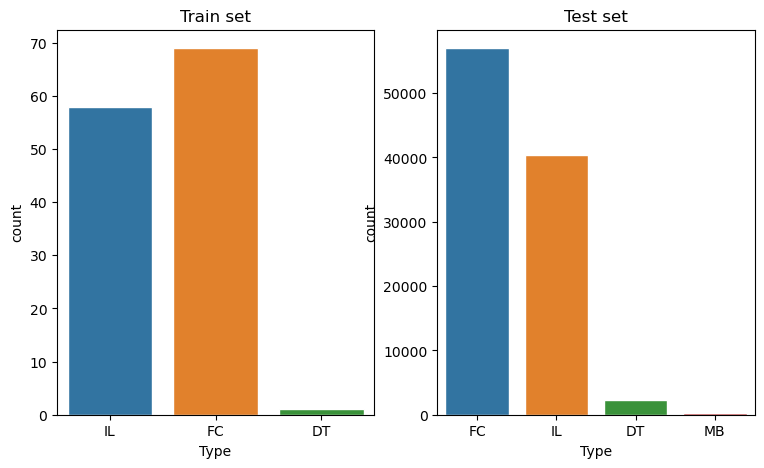

In [7]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(data=raw_df, x='Type',ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(data=test_data, x='Type',ax=ax[1])
ax[1].set_title('Test set');


There is not even asingle observation of type 'MB' in training set. This is a problem for our model.
In that case, you may want to consider dropping the 'MB' category altogether from both the training and test sets. 

In [8]:
raw_df = raw_df[raw_df['Type'] != 'MB']
test_data = test_data[test_data['Type'] != 'MB']

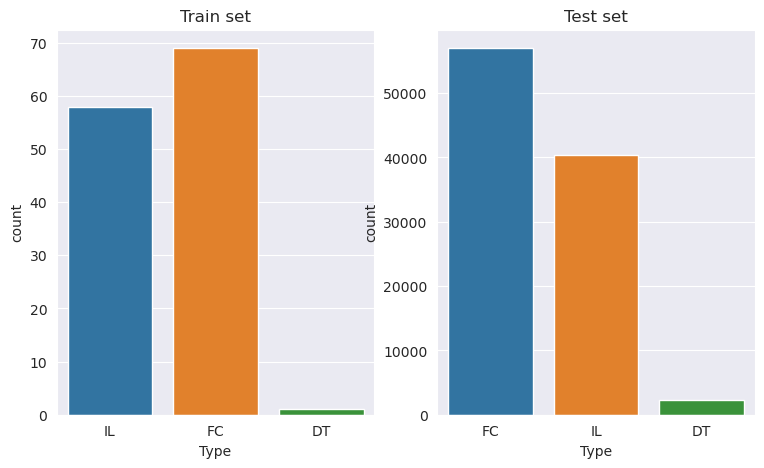

In [9]:
fig,ax = plt.subplots(1,2,figsize=(9,5))
sns.set_style('darkgrid')
sns.countplot(data=raw_df, x='Type',ax=ax[0])
ax[0].set_title('Train set')
sns.countplot(data=test_data, x='Type',ax=ax[1])
ax[1].set_title('Test set');

This code creates a checkpoint by concatenating the training and test datasets into one dataframe. It then extracts the month and year from the 'Open Date' column and creates two new columns, 'launch_Month' and 'launch_year'. The 'Id' and 'Open Date' columns are dropped from the dataframe. Finally, a countplot is created to visualize the number of restaurant launches in each month.

In [10]:
#Create a checkpoint so that we can easily access original dataset
df = pd.concat([raw_df,test_data],axis=0)

#Extracting month and year from data column
df['Open Date'] = pd.to_datetime(df['Open Date'])
df['launch_Month'] = [x.month for x in df['Open Date']]
df['launch_year'] = [x.year for x in df['Open Date']]
df.drop(['Id','Open Date'],axis=1,inplace=True)

Text(0.5, 1.0, 'Month-wise no of launches')

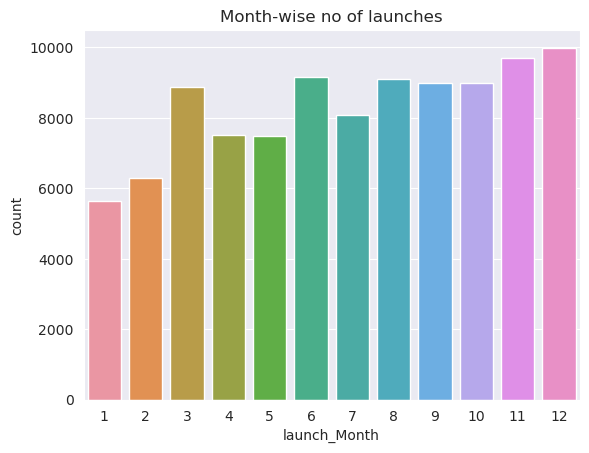

In [11]:
sns.countplot(data=df, x='launch_Month')
plt.title('Month-wise no of launches')

This suggests that TFI may be launching new restaurants more aggressively in the second half of the year.
Additionally, this information could be useful in planning future restaurant launches and identifying the optimal time of year to launch new locations.

This code is creating a count plot of the number of launches per year. It sets the figure size to 15 inches wide by 6 inches high using plt.figure(figsize=(15,6)). The count plot is created using Seaborn's sns.countplot() function, which takes in the data to be plotted and the variable to be counted, in this case df['launch_year']. The order parameter is set to a list of the years in ascending order, so that the bars are plotted in chronological order. Finally, a title is added to the plot using plt.title().

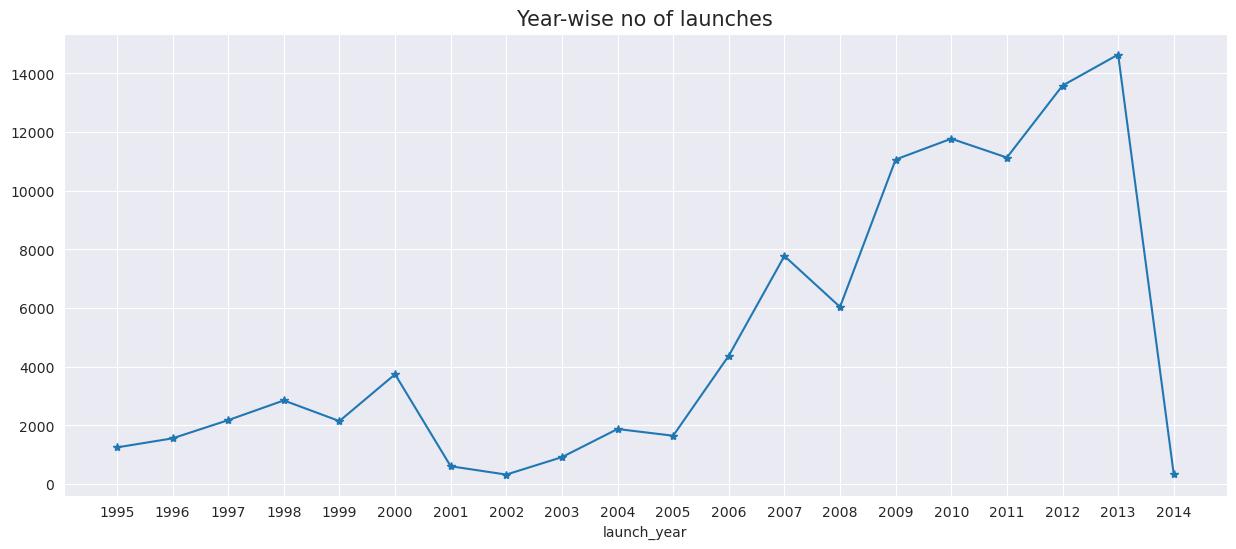

In [12]:
plt.figure(figsize=(15,6))
df.groupby('launch_year').size().plot(kind='line', marker='*')
plt.title('Year-wise no of launches', fontsize=15)
plt.xticks(df['launch_year'].unique())
plt.show()


This line plot shows the trend of the number of restaurant launches over the years. It seems that the number of restaurant launches has been increasing over time, which could be due to several social factors.

# Prepocessing the data
The dataset has categorical variables that require preprocessing before feeding into machine learning algorithms. The 'City' column has too many different categories, so it is better to drop it as it does not add much value. The 'Type' and 'City Group' columns can be handled using one-hot encoding to convert them into numerical values.

In [13]:
df['Type'].value_counts()

FC    57088
IL    40505
DT     2245
Name: Type, dtype: int64

In [14]:
df['City Group'].value_counts()

Other         50611
Big Cities    49227
Name: City Group, dtype: int64

In [15]:
df['City'].value_counts()

İstanbul     34047
Ankara        8719
İzmir         6461
Antalya       5904
Kocaeli       4356
             ...  
Elazığ           1
Osmaniye         1
Amasya           1
Kastamonu        1
Karabük          1
Name: City, Length: 63, dtype: int64

The 'City' column has too many different categories, so it is better to drop it as it does not add much value. The 'Type' and 'City Group' columns can be handled using one-hot encoding to convert them into numerical values.

In [16]:
df.drop('City',axis=1,inplace=True)

In [17]:
#converting other categorical columns
df['Type'] = df['Type'].map({'FC':0,'IL':1,'DT':2,'MB':3})

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['City Group'] = encoder.fit_transform(np.array(df['City Group']).reshape(-1,1))
df['City Group'] = df['City Group'].apply(int)

The block code is converting categorical columns 'Type' and 'City Group' to numerical values. The 'Type' column is mapped with 0 for 'FC', 1 for 'IL', 2 for 'DT', and 3 for 'MB'. The 'City Group' column is encoded using OrdinalEncoder and converted to integers.

In [18]:
df.dropna().groupby('launch_Month')['revenue'].mean()

launch_Month
1     4.521243e+06
2     4.189109e+06
3     3.477052e+06
4     3.749950e+06
5     3.657800e+06
6     3.776214e+06
7     3.458596e+06
8     3.883020e+06
9     4.526998e+06
10    4.056980e+06
11    4.403934e+06
12    3.720047e+06
Name: revenue, dtype: float64

In [19]:
df.groupby('launch_year')['revenue'].mean()

launch_year
1995             NaN
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    5.246965e+06
2000    7.495092e+06
2001             NaN
2002    4.991022e+06
2003             NaN
2004    3.482435e+06
2005    3.298470e+06
2006    3.360841e+06
2007    4.317164e+06
2008    4.588214e+06
2009    4.094408e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.540404e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

This code groups the data by the 'launch_year' column and calculates the mean of the 'revenue' column for each year. It then displays the result as a series of values, where the index is the year and the value is the mean revenue for that year.

* For example, in the year 1996, the mean revenue was $3.9 million, while in 2014 it was $2.4 million. It is possible to see the fluctuations in revenue over the years.
* Year 1999 has recorded highest revenues.
* Years 2000, 2013 and 2014 proved to be worst years for restaurants. Though number of observations is too low for year 2014, may be the big picture is differnt from this

In [20]:
#Convert launch year and month to string type
df.launche_year = df.launch_year.astype(str)
df.launch_Month = df.launch_Month.astype(str)

#Create dummy variables for launch year and month
year_dummy = pd.get_dummies(df[['launch_year', 'launch_Month']], drop_first=True)

#Concatenate original datafreme with dummy variable dataframe
df = pd.concat([df,year_dummy],axis=1)

#Drop original launch year and month columns
df.drop(['launch_year','launch_Month'],axis=1, inplace=True)

The resulting dataframe has new columns corresponding to the dummy variables created for the 'launch_year' and 'launch_Month' columns, which can be used for further analysis and modeling.

In [21]:
# Re-splitting train and test data
processed_df = df.dropna(axis=0)
processed_test_data = df[128:].drop('revenue',axis=1)
# remember there were 137 rows in train data

In [22]:
processed_df.shape,processed_test_data.shape

((128, 51), (99710, 50))

In [23]:
#Check it once
processed_df.head()

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,launch_Month_10,launch_Month_11,launch_Month_12,launch_Month_2,launch_Month_3,launch_Month_4,launch_Month_5,launch_Month_6,launch_Month_7,launch_Month_8,launch_Month_9
0,0,1,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,0,0,0,0,0,0,1,0,0,0,0


After dropping any rows with null values, the remaining data is split into two new dataframes: `processed_df` and `processed_test_data`. The new test dataframe consists of the last 100000 rows of the original dataset and does not include the `revenue` column. The shapes of these new dataframes are printed and an example of the first few rows of `processed_df` is shown.


# Modelling

Splitting the train data further into training and testing sets is important in order to evaluate the performance of the machine learning models. In this code snippet, we are importing the train_test_split function from sklearn.model_selection module and using it to split the data into X (input features) and y (target variable) datasets. The X dataset is further split into training and testing sets with a test size of 20% and a random state of 12345 is used for reproducibility purposes.

In [24]:
from sklearn.model_selection import train_test_split

X = processed_df.drop('revenue', axis=1)
y = processed_df['revenue']

if X.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
else:
    print("No data to split.")


This code defines a dictionary of regressors to use and then trains and evaluates each model using the mean absolute error, mean squared error, and R2-score metrics. The results are stored in a dataframe and printed at the end. This version of the code is more readable and separates the logic of training and evaluation from the model selection and results storage.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

models = {
    'Linear Regression' : LinearRegression(),
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(),
    'K-nearest Neighbors' : KNeighborsRegressor(),
    'XGBoost' : XGBRegressor()
}

results = []
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R2-score': r2})

results_df = pd.DataFrame(results)
print(results_df)


                     Model           MAE           MSE  R2-score
0        Linear Regression  1.561925e+06  3.514537e+12 -0.386942
1      Logistic Regression  1.344192e+06  2.819577e+12 -0.112690
2            Decision Tree  1.681647e+06  4.684531e+12 -0.848657
3            Random Forest  1.076233e+06  1.636891e+12  0.354033
4  Support Vector Machines  1.407327e+06  2.555855e+12 -0.008617
5      K-nearest Neighbors  1.147998e+06  1.811929e+12  0.284958
6                  XGBoost  1.150776e+06  1.919110e+12  0.242661


The output shows the evaluation results of different regression models trained on a given dataset. The models are evaluated based on their mean absolute error (MAE), mean squared error (MSE), and R2-score. The lower the MAE and MSE, and the higher the R2-score, the better the model's performance.

Looking at the results, we can see that the Random Forest model has the lowest MAE and MSE, and the highest R2-score, indicating that it has the best performance among the tested models. Linear regression, on the other hand, has negative R2-score, indicating that it's not a good fit for this dataset.

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [.03, 0.05, .07,.09], #so called `eta` value
              'max_depth': [6,7,8,9],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,700]}

xgb_grid = GridSearchCV(XGBRegressor(),
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X,y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
-0.012563276117576164
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}


This output shows the results of a grid search performed using the GridSearchCV function from the scikit-learn library. The search was conducted using the XGBRegressor model and a set of hyperparameters (learning_rate, max_depth, min_child_weight, subsample, colsample_bytree, and n_estimators) that were specified beforehand.

The output indicates that the search was conducted over 32 different parameter combinations (candidates) and that a total of 96 models were fit (3 folds per candidate). The best combination of hyperparameters was found to be {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7}, which achieved a score of -0.012563276117576164.

In [27]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)
predicted_test_values2 = knn.predict(processed_test_data)
submission2 = pd.DataFrame(columns=['Id','Prediction'])
submission2['Id'] = test_data['Id']
submission2['Prediction'] = predicted_test_values2
submission2.to_csv('submission_knn.csv',index=False)